In [1]:
%%bash --bg
roscore

Starting job # 0 in a separate thread.


In [2]:
%%bash --bg
rosrun stage_ros stageros -g maps/stage/maze.world

Starting job # 2 in a separate thread.


In [3]:
%%bash
rosparam set use_sim_time true

In [4]:
%%bash --bg
rosrun map_server map_server maps/maze.yaml

Starting job # 3 in a separate thread.


In [15]:
!rostopic list

/base_pose_ground_truth
/base_scan
/clock
/cmd_vel
/map
/map_metadata
/odom
/rosout
/tf


In [5]:
!rosnode list

/map_server_1519311167640193965
/rosout
/stageros


In [6]:
!rostopic echo -n 1 /map_metadata

map_load_time: 
  secs: 0
  nsecs:         0
resolution: 0.0500000007451
width: 200
height: 200
origin: 
  position: 
    x: 0.0
    y: 0.0
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 1.0
---


In [6]:
import rospy
from nav_msgs.msg import MapMetaData, OccupancyGrid

def cb_MapMetaData(data):
    global mmd
    mmd = data
    
def cb_OccupancyGrid(data):
    global og
    og = data.data

In [7]:
rospy.init_node('listener', anonymous=True)

In [8]:
rospy.Subscriber('/map_metadata', MapMetaData, cb_MapMetaData)

In [9]:
mmd

map_load_time: 
  secs: 0
  nsecs:         0
resolution: 0.0500000007451
width: 200
height: 200
origin: 
  position: 
    x: 0.0
    y: 0.0
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 1.0

In [10]:
rospy.Subscriber('/map', OccupancyGrid, cb_OccupancyGrid)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import numpy as np

In [38]:
m = np.array(og)

In [48]:
m = np.flipud(100 - m.reshape((200, 200)))

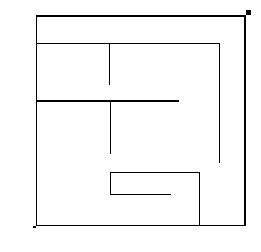

In [53]:
plt.imshow(m, cmap='gray');
plt.axis('off');

In [22]:
!rostopic echo -n 1 /base_pose_ground_truth

header: 
  seq: 2916
  stamp: 
    secs: 291
    nsecs: 700000000
  frame_id: "odom"
child_frame_id: ''
pose: 
  pose: 
    position: 
      x: 2.0
      y: 2.0
      z: 0.0
    orientation: 
      x: 0.0
      y: 0.0
      z: 0.0
      w: 1.0
  covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
twist: 
  twist: 
    linear: 
      x: 0.0
      y: 0.0
      z: 0.0
    angular: 
      x: 0.0
      y: 0.0
      z: 0.0
  covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
---
